# ASSIGNMENT 11 : RECOMMENDATION SYSTEM

#### Data Preprocessing:
#### 1. Load the dataset into a suitable data structure (e.g., pandas DataFrame).
#### 2. Handle missing values, if any.
#### 3. Explore the dataset to understand its structure and attributes.

In [3]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the dataset
df = pd.read_csv(r"F:\Data science Course by ExcelR\ASSIGNMENTS\11. Recommendation System\anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df.shape

(12294, 7)

In [6]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

We have 12294 rows with 7 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


* Most of the columns are of object type.
* We also observe that episodes is also in object format, it will be better if we have it in int format.

In [10]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

* We have quite a few null values in our data set
* We are assuming genre is a very important factor in this example so we'll be avoiding filling it, instead we'll be removing those rows.
* We are assuming type is not that important and has only a few null values so we'll be filling it with mode value.
* rating is also an important factor so we'll be filling it with mean value

In [12]:
print(df.shape)
df.dropna(subset=['genre'], inplace=True)
print(df.shape)

(12294, 7)
(12232, 7)


Rows with null values of genre column has been removed

In [14]:
mod_val = df['type'].mode().values                       #getting mod value
df['type'] = df['type'].fillna(mod_val[0])               #filling mod value in type column
df['rating'] = df['rating'].fillna(df['rating'].mean())  #filling the mean value on rating column

In [15]:
df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

* We observe null values here in the form of "Unknown"
* Here we are assuming "Unknown" values are a threat to our model, in addition it is also difficult to gauge or guess the number of episodes, so we'll be removing those rows containing null values.
* Let's replace "Unknown" with NaN and remove them.

In [17]:
df['episodes'] = df['episodes'].replace({'Unknown':np.NaN})

In [18]:
df['episodes'].isnull().sum()

329

We have 329 null values in the episodes column.

In [20]:
df.dropna(subset = ['episodes'], inplace=True)

In [21]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

* We can see all the null values are handeled.
* Let's convert type of episode into int type

In [23]:
df['episodes']=df['episodes'].astype(int)                 #converting dtype of episode into int

* Let's check the distribution of data in eipsodes, rating, members columns because these are the columns in numerical format.
* Even anime_id is also in int but it's not that useful so we'll be avoiding it.

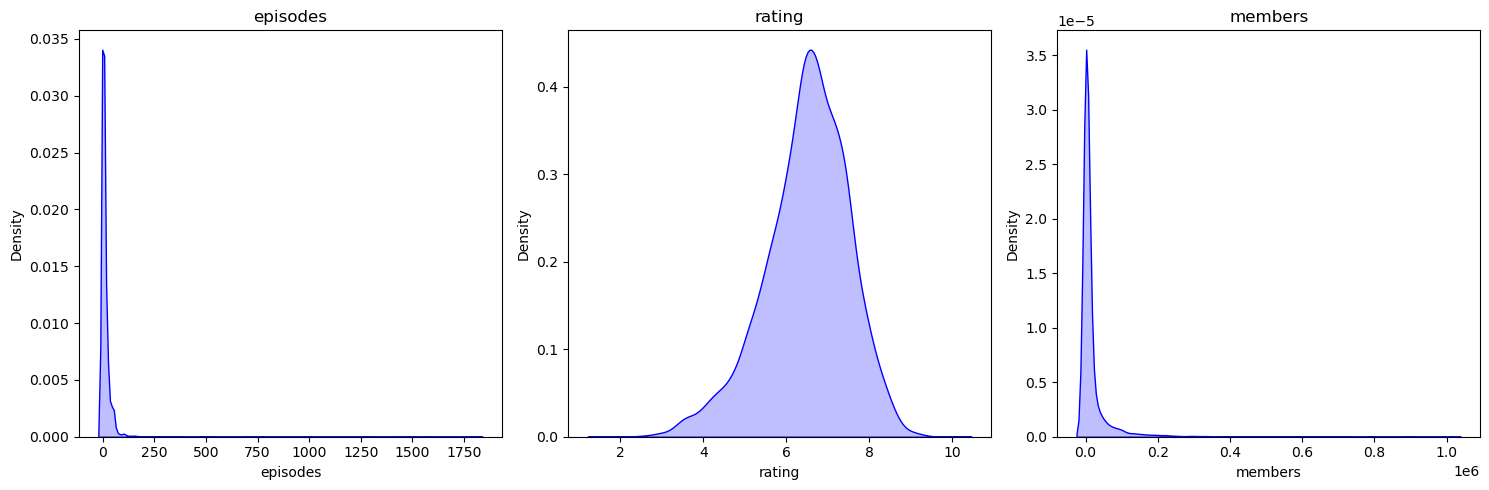

In [25]:
cols = ['episodes','rating','members']
plt.figure(figsize = (15,5))
i = 0
for col in cols:
    i += 1
    plt.subplot(1,3,i)
    sns.kdeplot(df[col], fill=True, color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

* All of the columns are one tailed
* episodes and members are left skewed
* rating seems to be right skewed

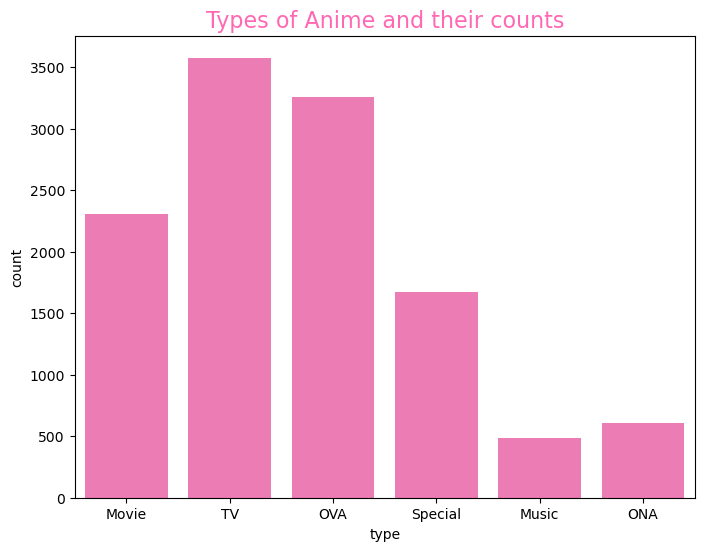

In [27]:
# Let's explore type column
plt.figure(figsize=(8,6))
sns.countplot(x=df['type'], color='hotpink')
plt.title("Types of Anime and their counts", size=16, color='hotpink')
plt.show()

We can see most of the anime series are of TV show followed by OVA and so on, and finally we have Music at the last position. 

* Here we will be focusing on building a recommendation system which recommends anime based on similarity of content.
* Therefore we'll be avoiding any unnecessary columns which may deviate the model recommendng based on content
* For example adding user rating and menmbers may involve bias in our recommendations so we'll be working with only 'genre' and 'type'
* Therefore we'll be adding 'rating' and 'members' externally.

#### Feature Extraction:
#### 1. Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
#### 2. Convert categorical features into numerical representations if necessary.
#### 3. Normalize numerical features if required.

In [31]:
# As discussed above we'll be working with only 2 columns 'genre' and 'type' because only those 2 columns
# closely relates to the content based recommendation and add the rating and members externally
#Let's work with categorical columns

from sklearn.feature_extraction.text import CountVectorizer

df['combo_feature'] = df['genre']+' '+df['type']               # This will be acting as our categorical column
cv = CountVectorizer()
genre_type_matrix = cv.fit_transform(df['combo_feature'])
genre_type_matrix

<11903x52 sparse matrix of type '<class 'numpy.int64'>'
	with 52090 stored elements in Compressed Sparse Row format>

In [32]:
#Now let's work with numerical columns to be concated externally
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = scaler.fit_transform(df[['rating','members']])
numerical_features

array([[9.24369748e-01, 1.97872202e-01],
       [9.11164466e-01, 7.82770102e-01],
       [9.09963986e-01, 1.12689267e-01],
       ...,
       [3.85354142e-01, 2.11063682e-04],
       [3.97358944e-01, 1.67667411e-04],
       [4.54981993e-01, 1.35120208e-04]])

* Using CountVectorizer our categorical data wich is a combo of 'genre' and 'type' is ready in numerical(matrix) format.
* For regularizing numercal column we used MinMaxScaler.
* Next step is to concat both the features.

In [34]:
combined_feature_matrix = np.hstack([genre_type_matrix.toarray(), numerical_features])
combined_feature_matrix

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.24369748e-01, 1.97872202e-01],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.11164466e-01, 7.82770102e-01],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.09963986e-01, 1.12689267e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.85354142e-01, 2.11063682e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.97358944e-01, 1.67667411e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.54981993e-01, 1.35120208e-04]])

* Using hstack we are have stacked the genre_type_matrix and numerical_features horizontally
* Now our data is ready to be processed, features are extracted and converted in the most optimal form.

#### Recommendation System:

#### 1. Design a function to recommend anime based on cosine similarity.
#### 2. Given a target anime, recommend a list of similar anime based on cosine similarity scores.
#### 3. Experiment with different threshold values for similarity scores to adjust the recommendation list size.

In [37]:
#Let's write a function which returns recommended anime after considering all the aspects of the given anime

from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(df, target_anime, combined_feature_matrix, top_n = 5, similarity_threshold = 0.5):
    target_index = df[df['name'].str.lower() == target_anime.lower()].index       # getting the index of the typed anime from the database(df)

    if target_index.empty:                 #checking if empty we return -1 meaning the typed anime is not present in df
        return -1

    target_index = target_index[0]                                                # fixing the index from list format

    cosine_sim = cosine_similarity(combined_feature_matrix)                      # caculating cosine similarity for the entire combined_feature_matrix

    similarity_scores = list(enumerate(cosine_sim[target_index]))                 #getting similarity scores for the target anime

    similar_anime = [(i, score) for i, score in similarity_scores if score >= similarity_threshold and i != target_index]   
    #Here we are getting animes which are similar to the target_anime based on similarit threshold (default value 50%)
    
    similar_anime = sorted(similar_anime, key=lambda x: x[1], reverse=True)[:top_n]  
    #Here we are sorting the list of animes we got above

    recommendations = [(df.iloc[i]['name'], score) for i, score in similar_anime]       #Here simply we are getting the names of the animes which are most similar to the target anime

    return recommendations

In [38]:
 # Recommend similar anime

target_anime_name = "naruto"                # target anime
num_of_recommendations = 8                  # number of recommendations you want

recommendations = recommend_anime(df, target_anime_name, combined_feature_matrix, top_n=num_of_recommendations, similarity_threshold=0.6)

# recommendations
if (recommendations == -1):
    print(f"Given anime : {target_anime_name} not found in the dataset, Please try with different Anime Name")
else:
    # Display recommendations
    print("Recommended Anime:")
    for anime, score in recommendations:
        print(f"{anime}: Score = {score:.2f}")

Recommended Anime:
Trava: Fist Planet: Score = 1.00
Twin Signal: Family Game: Score = 0.93
Rokushin Gattai GodMars: Juunanasai no Densetsu: Score = 0.93
Sailor Victory: Score = 0.93
Ariel Deluxe: Score = 0.93
Ariel Visual: Score = 0.93
Vandread: Gekitou-hen: Score = 0.89
Vandread: Taidou-hen: Score = 0.89


In [39]:
 # Recommend similar anime with threshold 0.9

target_anime_name = "gintama"                # target anime
num_of_recommendations = 12                 # number of recommendations you want

recommendations = recommend_anime(df, target_anime_name, combined_feature_matrix, top_n=num_of_recommendations, similarity_threshold=0.9)

# recommendations
if (recommendations == -1):
    print(f"Given anime : {target_anime_name} not found in the dataset, Please try with different Anime Name")
else:
    # Display recommendations
    print("Recommended Anime:")
    for anime, score in recommendations:
        print(f"{anime}: Score = {score:.2f}")

Recommended Anime:
Gintama&#039;: Score = 1.00
Gintama°: Score = 1.00
Gintama&#039;: Enchousen: Score = 1.00


* I set the threshold to 0.9 meaning anythinf below 90% similarity will not be displayed
* In this example only 3 anime were similar more than 90% so it recommended only 3 of those

In [41]:
 # Recommend similar anime with threshold 1.0

target_anime_name = "one punch man"                # target anime
num_of_recommendations = 9                     # number of recommendations we are expecting

recommendations = recommend_anime(df, target_anime_name, combined_feature_matrix, top_n=num_of_recommendations, similarity_threshold=1.0)

# recommendations
if (recommendations == -1):
    print(f"Given anime : {target_anime_name} not found in the dataset, Please try with different Anime Name")
else:
    # Display recommendations
    print("Recommended Anime:")
    for anime, score in recommendations:
        print(f"{anime}: Score = {score:.2f}")

Recommended Anime:


* No anime is exactly similar to One Punch Man so it didn't return anything

#### Evaluation:
#### 1. Split the dataset into training and testing sets.
#### 2. Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
#### 3. Analyze the performance of the recommendation system and identify areas of improvement.

In a recommender system, the typical approach for splitting the dataset into training and testing sets and evaluating the system involves treating the task as a binary classification problem. Specifically, **I want to predict whether a user will like (or interact with) a certain anime or not.**

In [44]:
genres = df['genre'].str.get_dummies(sep=', ')
df_numerical = pd.concat([df.drop(['genre','combo_feature'], axis=1), genres], axis=1)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['rating', 'members']
df_numerical[numerical_cols] = scaler.fit_transform(df_numerical[numerical_cols])

In [78]:
pd.set_option('display.max_columns', None)
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1,2.840061,3.299624,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.731791,14.040307,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,TV,51,2.721948,1.735380,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,TV,24,2.643206,11.865257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,TV,51,2.633363,2.405574,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [82]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
anime_id,11903.0,1.351552e+04,11174.446066,1.000000,3361.500000,9885.000000,23485.000000,34527.000000
episodes,11903.0,1.242628e+01,46.959892,1.000000,1.000000,2.000000,12.000000,1818.000000
rating,11903.0,7.640886e-17,1.000042,-4.738868,-0.575378,0.084087,0.684496,3.460155
members,11903.0,0.000000e+00,1.000042,-0.333972,-0.329824,-0.305156,-0.156027,18.029375
Action,11903.0,2.335546e-01,0.423110,0.000000,0.000000,0.000000,0.000000,1.000000
Adventure,11903.0,1.939007e-01,0.395369,0.000000,0.000000,0.000000,0.000000,1.000000
Cars,11903.0,5.964883e-03,0.077005,0.000000,0.000000,0.000000,0.000000,1.000000
Comedy,11903.0,3.787281e-01,0.485091,0.000000,0.000000,0.000000,1.000000,1.000000
Dementia,11903.0,1.999496e-02,0.139989,0.000000,0.000000,0.000000,0.000000,1.000000
Demons,11903.0,2.436361e-02,0.154182,0.000000,0.000000,0.000000,0.000000,1.000000


In [84]:
# Calculate mean and standard deviation for episodes, rating, and members
mean_episodes = 12.486729
mean_rating = 0.006197
mean_members = 0.002928

std_dev_episodes = np.std(df_numerical['episodes'])
std_dev_rating = np.std(df_numerical['rating'])
std_dev_members = np.std(df_numerical['members'])

# Set threshold values
episodes_threshold = mean_episodes + std_dev_episodes
rating_threshold = mean_rating + std_dev_rating
members_threshold = mean_members + std_dev_members

print("Threshold values:")
print("Episodes threshold:", episodes_threshold)
print("Rating threshold:", rating_threshold)
print("Members threshold:", members_threshold)

Threshold values:
Episodes threshold: 59.44464858627481
Rating threshold: 1.0061970000000002
Members threshold: 1.0029279999999994


In [86]:
# Define threshold values for ratings, episodes, and members
rating_threshold = 1.001596873109577
episodes_threshold = 59.58186967572351
members_threshold = 1.0029082457034968

# Create binary target variable based on thresholds
df_numerical['liked'] = ((df_numerical['rating'] >= rating_threshold) |
                         (df_numerical['episodes'] >= episodes_threshold) |
                         (df_numerical['members'] >= members_threshold)).astype(int)

# Display the updated dataset with the new 'liked' column
df_numerical.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,liked
0,32281,Kimi no Na wa.,Movie,1,2.840061,3.299624,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,2.731791,14.040307,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,28977,Gintama°,TV,51,2.721948,1.735380,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,9253,Steins;Gate,TV,24,2.643206,11.865257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9969,Gintama&#039;,TV,51,2.633363,2.405574,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [88]:
print(df_numerical['liked'].value_counts())

liked
0    9757
1    2146
Name: count, dtype: int64


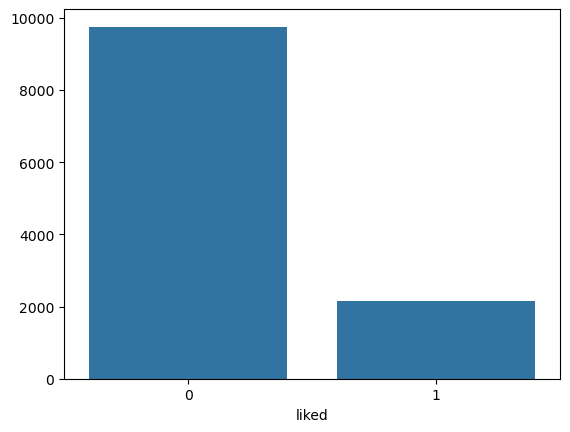

In [98]:
# Calculate value counts for the 'liked' column
liked_counts = df_numerical['liked'].value_counts()

# Plot bar plot
sns.barplot(x=liked_counts.index, y=liked_counts.values,)
plt.show()

* Here liked column will act as a target variable and rest of the columns as features.

In [103]:
from sklearn.model_selection import train_test_split

x = df_numerical.drop(['name', 'type','anime_id'], axis=1)  # Features
y = df_numerical['liked']  # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((9522, 47), (2381, 47), (9522,), (2381,))

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Train a binary classification model (logistic regression) using the scaled training set
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [148]:
y_pred = model.predict(x_test)
print("Accuracy Score : ", accuracy_score(y_pred, y_test))
print("Precision Score : ", precision_score(y_pred, y_test))
print("Recall Score : ", recall_score(y_pred, y_test))
print("F1 Score : ", f1_score(y_pred, y_test))

Accuracy Score :  1.0
Precision Score :  1.0
Recall Score :  1.0
F1 Score :  1.0


In [150]:
from sklearn.metrics import classification_report 

print("Classification Report : \n", classification_report(model.predict(x_test), y_test))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1945
           1       1.00      1.00      1.00       436

    accuracy                           1.00      2381
   macro avg       1.00      1.00      1.00      2381
weighted avg       1.00      1.00      1.00      2381



* Our model appears to be performing perfectly, hence we can say our model is an excellent model.
* It appears that the recommendation system has achieved its objectives, and there may be little additional value in further analysis or refinement. As such, the process can be considered complete

### Interview questions
**1. Can you explain the difference between user-based and item-based collaborative filtering?**

**Answer**

**User-Based Collaborative Filtering:**  
- Suggests items to a user by finding other users with similar tastes.  
- Compares users to see who has similar preferences.  
- Works well when there are many users with lots of interactions.  
- Can struggle with new users who haven't rated many items (cold start problem).  
- Requires frequent updates as user preferences change over time.  
- Works best when users have clear, distinct preferences.  

**Item-Based Collaborative Filtering:**  
- Suggests items based on how similar they are to what a user has already liked.  
- Focuses on finding items that are alike.  
- Works well when there are many items but fewer interactions per item.  
- More stable over time since item similarities don’t change often.  
- Handles new users better, as long as there’s data on the items.  
- Useful for recommending niche or lesser-known items similar to popular ones.  

In short, **user-based filtering** focuses on finding similar users, while **item-based filtering** focuses on finding similar items. Each method is useful in different situations.

**2. What is collaborative filtering, and how does it work?**  

**Collaborative filtering** is a recommendation technique that suggests items to users based on shared preferences with others. It assumes that if two users have liked similar items in the past, they will likely enjoy similar items in the future.  

**How It Works:**  
1. **Collect User-Item Interactions:**  
   - Users interact with items by rating, purchasing, or watching them.  
2. **Find Similarities:**  
   - Identify similar users (user-based filtering) or similar items (item-based filtering).  
3. **Make Predictions:**  
   - Suggest items based on past interactions. If users with similar tastes liked an item, it's recommended.  
4. **Refine Recommendations:**  
   - The system updates as more users interact with items, improving recommendations over time.  

Collaborative filtering is widely used in streaming platforms (Netflix, Spotify) and e-commerce (Amazon) to enhance user experience.